In [3]:
import numpy as np
from data_reader import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
warning_path = 'data/warnings/'
warning_name = '05182017.csv'
warnings = read_data(warning_path+warning_name)
print(warnings.shape)
warnings = warnings[28:27655+28,:]
print(warnings.shape)

(27655, 4)


In [41]:
anomaly_path = 'data/anomalies/'
anomaly_name = '05182017.csv'
anomalies = read_data(anomaly_path+anomaly_name)
print(anomalies.shape)

(27655, 4)


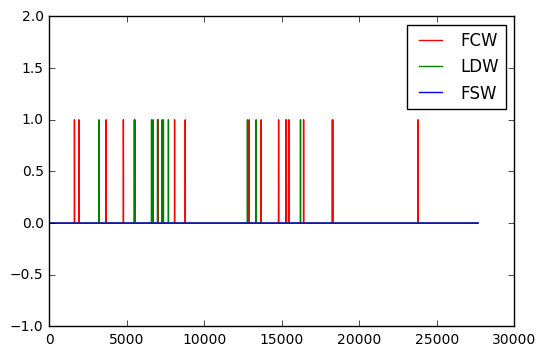

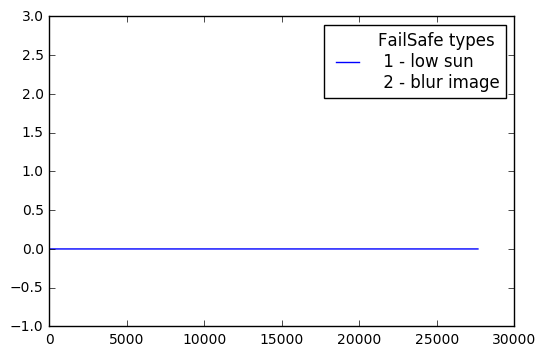

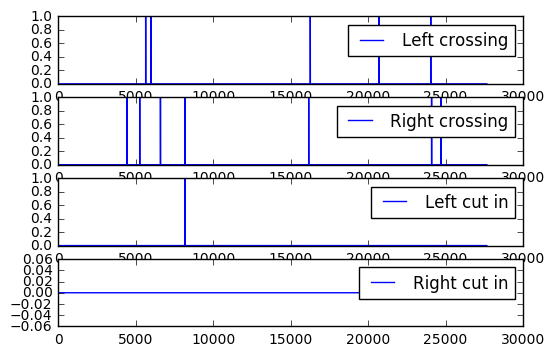

In [43]:
'''
Read and process the warning signals
'''
FCW = warnings[:,1].astype(int)# Forward Collision Warning
LLDW = warnings[:,2].astype(int) # Left Lane Departure Warning
RLDW = warnings[:,3].astype(int) # Right Lane Departure Warning
LDW = LLDW|RLDW 
FSW = warnings[:,4].astype(int) # FailSafe Warning
FSType = warnings[:,5].astype(int) # FailSafe Types

LCrossing = warnings[:,7]
RCrossing = warnings[:,8]
LCutIn = warnings[:,9]
RCutIn = warnings[:,10]

plt.figure(1)
plt.plot(FCW,'r')
plt.plot(LDW,'g')
plt.plot(FSW,'b')
plt.ylim([-1,2])
plt.legend(['FCW','LDW','FSW'])

plt.figure(2)
plt.plot(FSType)
plt.ylim([-1,3])
plt.legend(['FailSafe types\n 1 - low sun\n 2 - blur image'])

plt.figure(3)
plt.subplot(411)
plt.plot(LCrossing)
plt.legend(['Left crossing'])
plt.subplot(412)
plt.plot(RCrossing)
plt.legend(['Right crossing'])
plt.subplot(413)
plt.plot(LCutIn)
plt.legend(['Left cut in'])
plt.subplot(414)
plt.plot(RCutIn)
plt.legend(['Right cut in'])

[False False False ..., False False False]


<function matplotlib.pyplot.show>

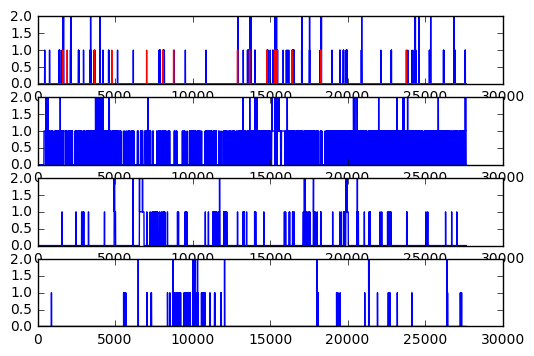

In [67]:
'''
Process computed anomaly scores
'''
thresh1 = 0.6
thresh2 = 0.2
Rt = anomalies[:,0] / np.max(anomalies[:,0])
Rd = anomalies[:,1] / np.max(anomalies[:,1])
Rb = anomalies[:,2] / np.max(anomalies[:,2])
Ro = anomalies[:,3] / np.max(anomalies[:,3])

print(Rt>thresh1)

Rt[Rt>thresh1] = 2
Rt[Rt<thresh2] = 0
Rt[np.array(Rt>thresh2) & np.array(Rt<thresh1)] = 1

Rd[Rd>thresh1] = 2
Rd[Rd<thresh2] = 0
Rd[np.array(Rd>thresh2) & np.array(Rd<thresh1)] = 1

Rb[Rb>thresh1] = 2
Rb[Rb<thresh2] = 0
Rb[np.array(Rb>thresh2) & np.array(Rb<thresh1)] = 1

Ro[Ro>thresh1] = 2
Ro[Ro<thresh2] = 0
Ro[np.array(Ro>thresh2) & np.array(Ro<thresh1)] = 1

plt.figure(1)
plt.subplot(411)
plt.plot(Rt)
plt.plot(FCW,'r')
plt.subplot(412)
plt.plot(Rd)
plt.subplot(413)
plt.plot(Rb)
plt.subplot(414)
plt.plot(Ro)
plt.show

(3, 27655)
(27655, 3)
[[ 1.         -0.00406491         nan]
 [-0.00406491  1.                 nan]
 [        nan         nan         nan]]
[[  1.00000000e+00  -4.06490995e-03  -4.20256613e-03   4.12414247e-02
    2.75766960e-03  -5.85021505e-03]
 [ -4.06490995e-03   1.00000000e+00  -7.79618280e-03  -2.53759154e-02
    2.72501652e-02  -5.69493611e-03]
 [ -4.20256613e-03  -7.79618280e-03   1.00000000e+00   6.61277304e-02
    9.09214858e-03  -1.12202598e-02]
 [  4.12414247e-02  -2.53759154e-02   6.61277304e-02   1.00000000e+00
   -1.57082308e-02  -3.77974234e-02]
 [  2.75766960e-03   2.72501652e-02   9.09214858e-03  -1.57082308e-02
    1.00000000e+00   8.06948650e-04]
 [ -5.85021505e-03  -5.69493611e-03  -1.12202598e-02  -3.77974234e-02
    8.06948650e-04   1.00000000e+00]]


<function matplotlib.pyplot.show>

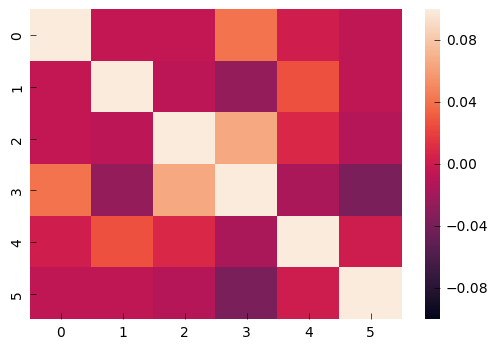

In [70]:
system_warnings = np.vstack([FCW, LDW, FSW])
print (system_warnings.shape)
system_warnings = system_warnings.T
print (system_warnings.shape)
warning_corr = np.corrcoef(system_warnings, rowvar=False)
print (warning_corr)

warning_anomaly = np.vstack([FCW, LDW, Rt, Rd, Rb, Ro]) # remove FSW since it was a constant in 05182017 data
warning_anomaly = warning_anomaly.T
warning_anomaly_corr = np.corrcoef(warning_anomaly, rowvar=False)

print (warning_anomaly_corr)

plt.figure(1)
sns.heatmap(warning_anomaly_corr,vmin=-0.1, vmax=0.1, cbar=True)
plt.show

In [5]:
'''
Load all experiment drivings and do statistics together
'''
import glob
warning_path = 'data/warnings/'
all_names = glob.glob(warning_path+'*.csv')
all_exps = []
for i, name in enumerate(all_names):
    exp_drive = read_data(name)
    if i == 0:
        all_exps = exp_drive
    else:
        all_exps = np.vstack([all_exps, exp_drive])
all_exps.shape

(132463, 18)

(3, 132463)
(132463, 3)
[[ 1.         -0.00242566 -0.00962562]
 [-0.00242566  1.         -0.0108524 ]
 [-0.00962562 -0.0108524   1.        ]]


<function matplotlib.pyplot.show>

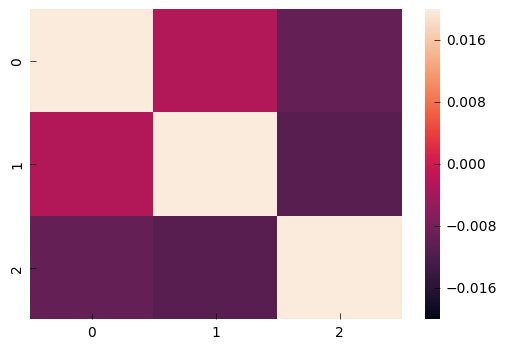

In [6]:
all_FCW = all_exps[:,1].astype(int)# Forward Collision Warning
all_LLDW = all_exps[:,2].astype(int) # Left Lane Departure Warning
all_RLDW = all_exps[:,3].astype(int) # Right Lane Departure Warning
all_LDW = all_LLDW|all_RLDW 
all_FSW = all_exps[:,4].astype(int) # FailSafe Warning
all_FSType = all_exps[:,5].astype(int) # FailSafe Types

all_LCrossing = all_exps[:,7]
all_RCrossing = all_exps[:,8]
all_LCutIn = all_exps[:,9]
all_RCutIn = all_exps[:,10]

all_system_warnings = np.vstack([all_FCW, all_LDW, all_FSW])
print (all_system_warnings.shape)
all_system_warnings = all_system_warnings.T
print (all_system_warnings.shape)

warning_corr = np.corrcoef(all_system_warnings, rowvar=False)
print (warning_corr)

plt.figure(1)
sns.heatmap(warning_corr,vmin=-0.02, vmax=0.02, cbar=True)
plt.show

[0 0 0 ..., 0 0 0]


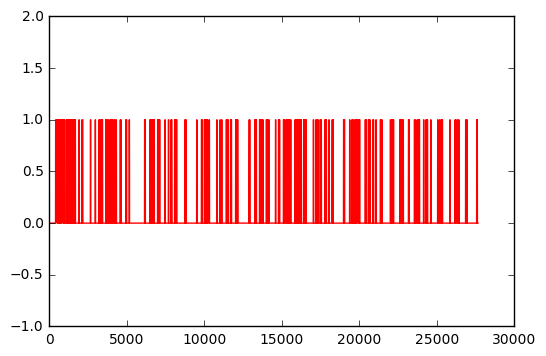

In [11]:
'''
Load optimal action for 05182017 trajectory and compare with warning/anomalies
'''
optimal_action_path = []
with open('optimal_action.txt') as f:
    lines = f.readlines()
    for line in lines:
        optimal_action_path.append(int(line.strip()))
optimal_action_path = np.array(optimal_action_path)
print (optimal_action_path)
plt.figure(1)
plt.plot(optimal_action_path,'r')
plt.ylim([-1,2])
plt.show()